<a href="https://colab.research.google.com/github/kamm8899/CatVSDog/blob/main/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patoolib
import time

In [6]:
patoolib.extract_archive('/content/drive/MyDrive/test3.zip')
patoolib.extract_archive('/content/drive/MyDrive/train5.zip')

INFO patool: Extracting /content/drive/MyDrive/test3.zip ...
INFO:patool:Extracting /content/drive/MyDrive/test3.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_luhmtzzt -- /content/drive/MyDrive/test3.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_luhmtzzt -- /content/drive/MyDrive/test3.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/test3.zip extracted to `test1'.
INFO:patool:... /content/drive/MyDrive/test3.zip extracted to `test1'.
INFO patool: Extracting /content/drive/MyDrive/train5.zip ...
INFO:patool:Extracting /content/drive/MyDrive/train5.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_73di8gb0 -- /content/drive/MyDrive/train5.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_73di8gb0 -- /content/drive/MyDrive/train5.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/train5.zip extracted to `train5' (multiple files in root).
INFO:patool:... /content/dri

'train5'

In [5]:
img_size = (100, 100)
batch_size = 64

In [6]:
# Creating training and testing sets
start_time=time.time()
training_set =tf.keras.utils.image_dataset_from_directory('/content/train5/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                class_names = ['cat', 'dog'])

test_set = tf.keras.utils.image_dataset_from_directory('/content/test1',
                                            image_size = img_size,
                                            batch_size = batch_size,
                                            label_mode = None)
end_time=time.time()
print(end_time - start_time)

Found 25000 files belonging to 2 classes.
Found 12500 files belonging to 1 classes.
2.230053663253784


In [ ]:
#Attempt 1 as is at 10 Epochs
# Defining the model architecture
start_time=time.time()
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model =model.fit(training_set,epochs=10)
end_time=time.time()
print(end_time - start_time)

Epoch 1/10
391/391 [==============================] - 695s 2s/step - loss: 3.6929 - accuracy: 0.5880
Epoch 2/10
391/391 [==============================] - 695s 2s/step - loss: 0.6131 - accuracy: 0.6586
Epoch 3/10
391/391 [==============================] - 700s 2s/step - loss: 0.5568 - accuracy: 0.7129
Epoch 4/10
391/391 [==============================] - 686s 2s/step - loss: 0.4627 - accuracy: 0.7781
Epoch 5/10
391/391 [==============================] - 693s 2s/step - loss: 0.3582 - accuracy: 0.8381
Epoch 6/10
391/391 [==============================] - 698s 2s/step - loss: 0.2668 - accuracy: 0.8877
Epoch 7/10
391/391 [==============================] - 688s 2s/step - loss: 0.2457 - accuracy: 0.8990
Epoch 8/10
391/391 [==============================] - 688s 2s/step - loss: 0.1585 - accuracy: 0.9377
Epoch 9/10
391/391 [==============================] - 694s 2s/step - loss: 0.1413 - accuracy: 0.9472
Epoch 10/10
391/391 [==============================] - 686s 2s/step - loss: 0.1106 - accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


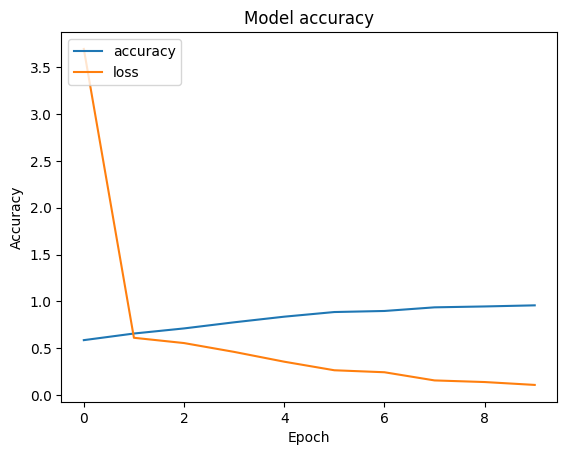

In [ ]:
#Plotting Accuracy

plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
#accuracy has a ceiling of 1, accuracy rose loss decreased

In [ ]:

#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)

196/196 [==============================] - 115s 583ms/step


In [ ]:
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions.csv')

In [ ]:
len(pred_label)
len(index)

25000

In [7]:
#Attempt 2
# Creating training and testing sets
training_set, validation_set =tf.keras.utils.image_dataset_from_directory('/content/train5/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                 seed = 0,
                                                 validation_split = 0.2,
                                                 subset= 'both',
                                                 class_names = ['cat', 'dog'])




Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x),y))
validation_set=validation_set.map(lambda x, y: (normalization_layer(x),y))

In [ ]:
#adding Normalization, scaling data and adding validation set
start_time=time.time()
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
attempt2_model =model.fit(training_set,epochs=10, validation_data=validation_set)
end_time=time.time()
print(end_time - start_time)

Epoch 1/10
313/313 [==============================] - 595s 2s/step - loss: 0.9519 - accuracy: 0.7140 - val_loss: 0.8768 - val_accuracy: 0.5106
Epoch 2/10
313/313 [==============================] - 577s 2s/step - loss: 0.3645 - accuracy: 0.8356 - val_loss: 0.5422 - val_accuracy: 0.7418
Epoch 3/10
313/313 [==============================] - 541s 2s/step - loss: 0.2485 - accuracy: 0.8966 - val_loss: 0.5519 - val_accuracy: 0.8098
Epoch 4/10
 66/313 [=====>........................] - ETA: 7:10 - loss: 0.1990 - accuracy: 0.9181

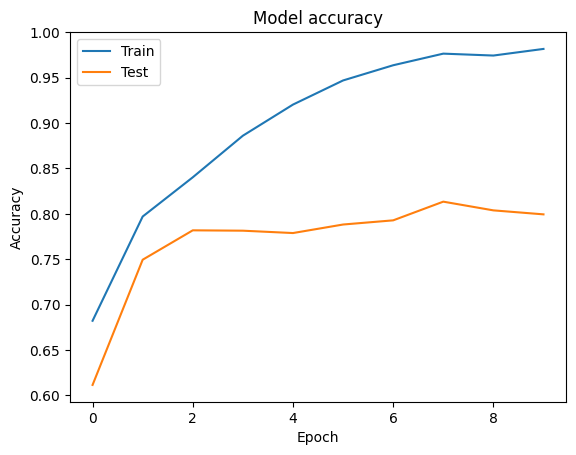

In [ ]:
#plotting accuracy
plt.plot(attempt2_model.history['accuracy'])
plt.plot(attempt2_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

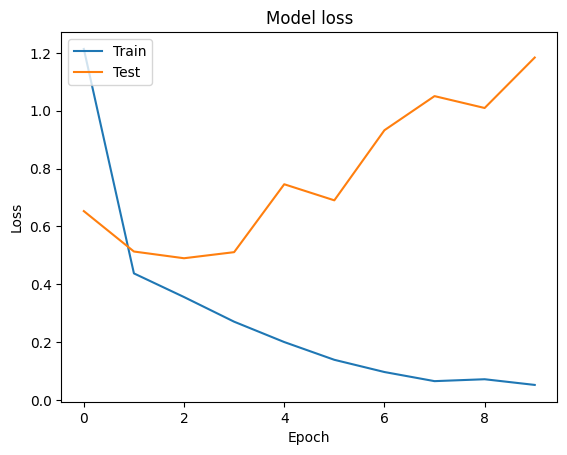

In [ ]:
#plotting loss
plt.plot(attempt2_model.history['loss'])
plt.plot(attempt2_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#evaluate
score = model.evaluate(validation_set)
print()
print('Test accuracy: ', score[1])

79/79 [==============================] - 85s 1s/step - loss: 1.1839 - accuracy: 0.7994

Test accuracy:  0.7993999719619751


In [ ]:
#Make plot for training and validation set
#two plots one for loss one for accruacy
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions2.csv')

#overfit to the training set, and picking up random noise which leads to misprediction


196/196 [==============================] - 212s 1s/step


In [ ]:
#Attemp 3 Add Dropout
#changed batch size
#keras.layers.Conv2D(64, (3, 3), activation='relu'), change 3,3 to 7,7, Conv2D 512, 128, 3,3= windows- larger mide be more effective, possible add strides, leakyRelu for one
#maybe change Dropout

In [ ]:
training_set, validation_set =tf.keras.utils.image_dataset_from_directory('/content/train5/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                 seed = 0,
                                                 validation_split = 0.2,
                                                 subset= 'both',
                                                 class_names = ['cat', 'dog'])

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x),y))
validation_set=validation_set.map(lambda x, y: (normalization_layer(x),y))

In [ ]:
#adding Normalization, scaling data and adding validation set
start_time=time.time()
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout((0.5)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout((0.5)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout((0.5)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
attempt3_model =model.fit(training_set,epochs=10, validation_data=validation_set)
end_time=time.time()
print(end_time - start_time)

Epoch 1/10
313/313 [==============================] - 564s 2s/step - loss: 0.8683 - accuracy: 0.6160 - val_loss: 1.8098 - val_accuracy: 0.4984
Epoch 2/10
313/313 [==============================] - 556s 2s/step - loss: 0.5611 - accuracy: 0.7034 - val_loss: 1.4067 - val_accuracy: 0.5218
Epoch 3/10
313/313 [==============================] - 560s 2s/step - loss: 0.5243 - accuracy: 0.7359 - val_loss: 1.6036 - val_accuracy: 0.5274
Epoch 4/10
313/313 [==============================] - 558s 2s/step - loss: 0.4954 - accuracy: 0.7563 - val_loss: 0.9069 - val_accuracy: 0.5972
Epoch 5/10
313/313 [==============================] - 554s 2s/step - loss: 0.4628 - accuracy: 0.7829 - val_loss: 0.6866 - val_accuracy: 0.6844
Epoch 6/10
313/313 [==============================] - 553s 2s/step - loss: 0.4330 - accuracy: 0.7976 - val_loss: 0.6387 - val_accuracy: 0.7278
Epoch 7/10
313/313 [==============================] - 551s 2s/step - loss: 0.4065 - accuracy: 0.8154 - val_loss: 0.8384 - val_accuracy: 0.6544

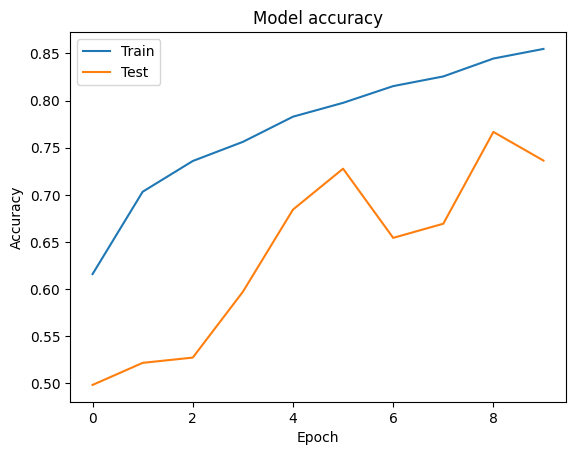

In [ ]:
#plotting accuracy
plt.plot(attempt3_model.history['accuracy'])
plt.plot(attempt3_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

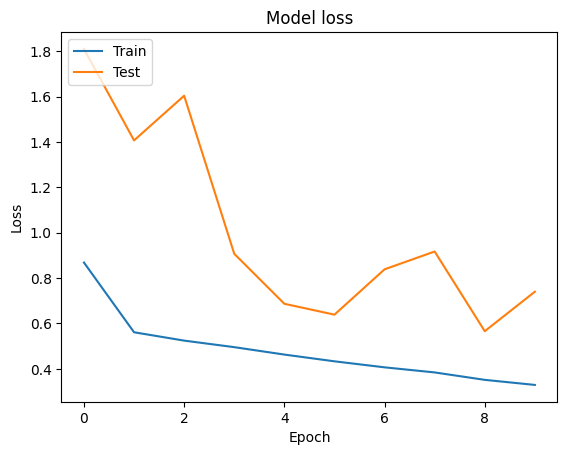

In [ ]:
#plotting loss
plt.plot(attempt3_model.history['loss'])
plt.plot(attempt3_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#evaluate
score = model.evaluate(validation_set)
print()
print('Test accuracy: ', score[1])

79/79 [==============================] - 37s 467ms/step - loss: 0.7399 - accuracy: 0.7364

Test accuracy:  0.7364000082015991


In [ ]:
#Make plot for training and validation set
#two plots one for loss one for accruacy
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions3.csv')

#overfit to the training set, and picking up random noise which leads to misprediction


196/196 [==============================] - 91s 464ms/step


In [ ]:

#add layer to conv or change EPOCHS

#Attempt 4
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
X_input = Input((100,100,3))
# Zero-Padding
X = ZeroPadding2D((3, 3))(X_input)

In [ ]:
#Attempt 4 ResNet
# Define model

X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv1', kernel_initializer =glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)



In [ ]:
# Stage 2 for ResNet

X_shortcut = X

In [ ]:
# Below is the script for your own ResNet:
X = Conv2D(64, kernel_size=(1, 1), strides=(1, 1),
               padding='same', name="conv2",
               kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv2')(X)
X = Activation('relu')(X)

In [ ]:
# Save the input value. You'll need this later to add back to the main path.

X=Add()([X,X_shortcut])
X = Activation('relu')(X)

In [ ]:
# output layer
X = Flatten()(X)
X = Dense(1, activation='sigmoid', name='fc' + str(10), kernel_initializer = glorot_uniform(seed=0))(X)

In [ ]:
# Create model
model =keras.models.Model(inputs = X_input, outputs = X, name='ResNet50')

In [ ]:
model.compile(optimizer= 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [ ]:
#do I not do model.fit?
attempt4_model =model.fit(training_set,epochs=10, validation_data=validation_set)

Epoch 1/10
313/313 [==============================] - 205s 639ms/step - loss: 0.9610 - accuracy: 0.6574 - val_loss: 0.6730 - val_accuracy: 0.6034
Epoch 2/10
313/313 [==============================] - 202s 642ms/step - loss: 0.7168 - accuracy: 0.7261 - val_loss: 0.5289 - val_accuracy: 0.7474
Epoch 3/10
313/313 [==============================] - 207s 660ms/step - loss: 0.5756 - accuracy: 0.7646 - val_loss: 0.6778 - val_accuracy: 0.7386
Epoch 4/10
313/313 [==============================] - 196s 624ms/step - loss: 0.5191 - accuracy: 0.7840 - val_loss: 0.7829 - val_accuracy: 0.7088
Epoch 5/10
313/313 [==============================] - 195s 622ms/step - loss: 0.4804 - accuracy: 0.7998 - val_loss: 0.6219 - val_accuracy: 0.7460
Epoch 6/10
313/313 [==============================] - 206s 653ms/step - loss: 0.3910 - accuracy: 0.8272 - val_loss: 0.6249 - val_accuracy: 0.7362
Epoch 7/10
313/313 [==============================] - 203s 647ms/step - loss: 0.3693 - accuracy: 0.8377 - val_loss: 0.7409 -

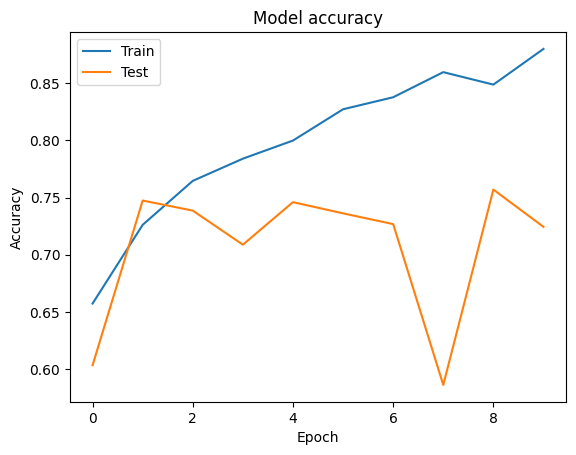

In [ ]:
#plotting accuracy
plt.plot(attempt4_model.history['accuracy'])
plt.plot(attempt4_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

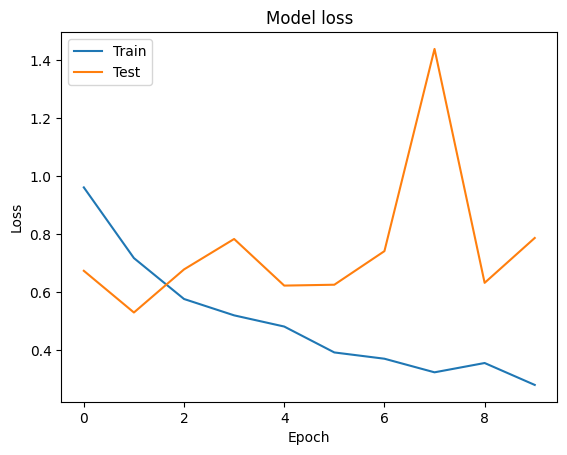

In [ ]:
#plotting loss
plt.plot(attempt4_model.history['loss'])
plt.plot(attempt4_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#evaluate
score = model.evaluate(validation_set)
print()
print('Test accuracy: ', score[1])

79/79 [==============================] - 18s 218ms/step - loss: 0.7863 - accuracy: 0.7244

Test accuracy:  0.724399983882904


In [ ]:
#Make plot for training and validation set
#two plots one for loss one for accruacy
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions4.csv')

#overfit to the training set, and picking up random noise which leads to misprediction

196/196 [==============================] - 41s 205ms/step


In [ ]:
#Attempt 5 ANN
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape = (100,100,3)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#512 model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
attempt5_model = model.fit(training_set,
                          epochs=100,
                          batch_size=512,
                          validation_data= validation_set)

Epoch 1/100
391/391 [==============================] - 173s 439ms/step - loss: 349.4646 - accuracy: 0.5044 - val_loss: 0.7264 - val_accuracy: 0.4858
Epoch 2/100
391/391 [==============================] - 176s 450ms/step - loss: 2.3841 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 3/100
391/391 [==============================] - 162s 414ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 4/100
391/391 [==============================] - 174s 442ms/step - loss: 0.6931 - accuracy: 0.4972 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 5/100
391/391 [==============================] - 175s 446ms/step - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 6/100
391/391 [==============================] - 187s 477ms/step - loss: 0.6931 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 7/100
391/391 [==============================] - 191s 485ms/step - loss: 0.6931 - accuracy: 0.4986 - val_loss:

In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

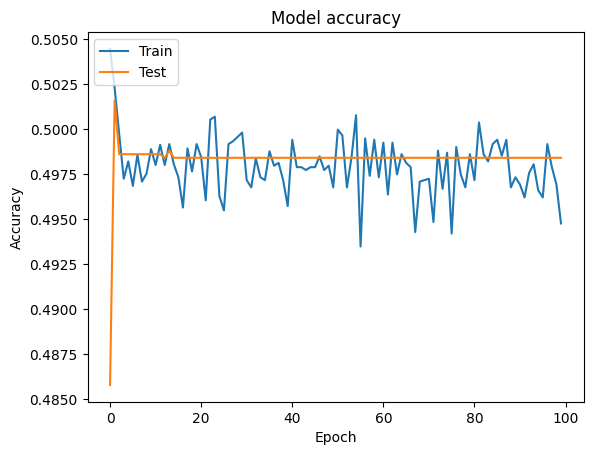

In [ ]:
#not the right way to do this
#plotting accuracy
plt.plot(attempt5_model.history['accuracy'])
plt.plot(attempt5_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#shows that test isnt doing anything , accuracy goes down. wrong tool for the task

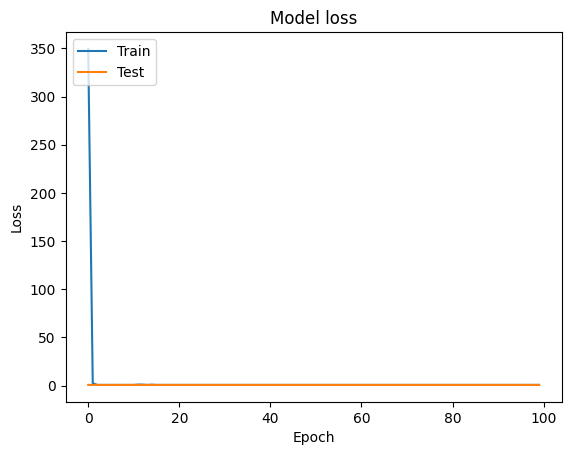

In [ ]:
#plotting loss
plt.plot(attempt5_model.history['loss'])
plt.plot(attempt5_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#test set doesnt do anything, dropped on first epoch then stabilized it

In [ ]:
#evaluate
score = model.evaluate(validation_set)
print()
print('Test accuracy: ', score[1])

79/79 [==============================] - 11s 139ms/step - loss: 0.6932 - accuracy: 0.4984

Test accuracy:  0.4984000027179718


In [ ]:
#Make plot for training and validation set
#two plots one for loss one for accruacy
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(test_set) #what is my xtest

#actuals = list(test_set) #what is my ytest

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
#sub.to_csv('./output_catordog.csv', index=False)
#creates array 0/1
pred_label = np.where(predictions.flatten()<0.5,1,0)
pred_label
index= np.arange(1,12501)
result = pd.DataFrame({'id':index, 'label': pred_label})
result.to_csv('/content/drive/MyDrive/cat_dog_predictions5.csv')

#overfit to the training set, and picking up random noise which leads to misprediction

196/196 [==============================] - 28s 136ms/step
